# Telco churn

# Business Problem

It is desirable to develop a machine learning model that can predict customers who will leave the company. You are expected to perform the necessary data analysis and feature engineering steps before developing the model.


# Column 
* customerID - unique value identifying customer
* gender - whether the customer is a male or a female
* SeniorCitizen - whether the customer is a senior citizen or not (1, 0)
* Partner - whether the customer has a partner or not (Yes, No)
* Dependents - whether the customer has dependents or not (Yes, No). A dependent is a person who relies on another as a primary source of income,
* tenure - number of months the customer has stayed with the company
* PhoneService - whether the customer has a phone service or not (Yes, No)
* MultipleLines - whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService - customer’s internet service provider (DSL, Fiber optic, No)
* nOnlineSecurity - whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup - whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection - whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport - whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV - whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies - whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract - type of contract according to duration (Month-to-month, One year, Two year)
* PaperlessBilling - bills issued in paperless form (Yes, No)
* PaymentMethod - payment method used by customer (Electronic check, Mailed check, Credit card (automatic), Bank transfer (automatic))
* MonthlyCharges - amount of charge for service on monthly bases
* TotalCharges - cumulative charges for service during subscription (tenure) period

# Importing libraries

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Data Wrangling

In [54]:
import warnings
warnings.simplefilter("ignore")

# Exploring my data

In [55]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [56]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
df.duplicated().sum()

0

In [59]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

it seems our data is tidy we do not have null or duplicated values, we will convert the type of Total charges into numeric

In [60]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') 

In [61]:
# converting SeniorCitizen into categorial
df['SeniorCitizen']=df['SeniorCitizen'].replace(to_replace=[0],value= 'No')
df['SeniorCitizen']=df['SeniorCitizen'].replace(to_replace=[1],value= 'Yes')
df['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [62]:
cat_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
number_list = ['tenure','MonthlyCharges', 'TotalCharges']

for col in cat_list: #Checking Data
    print(col)
    print(df[col].value_counts())
    print("-------------------------------------------------")

gender
Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------------------------
SeniorCitizen
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64
-------------------------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
-------------------------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
-------------------------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
-------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------------------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-------------------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet 

Looking at our categorical variables we can see that we have practically the same number of men and women, most of our data are from non-SeniorCitizen, most of our data are from non-dependents, most of the data have telephone service, and it is well divided between multiple lines and only one, when we look at the internet most use fiber optics, and do not have Online Security, Backup and Protection Device, when we look at support we see that most customers do not have this service when we look at the contract variable most contracts are monthly contracts, looking at the payment variable we can see that most payments are made from online

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [64]:
# dropping useless column
df=df.drop(['customerID'], axis=1)

In [65]:
df.dropna(inplace=True)

# EDA

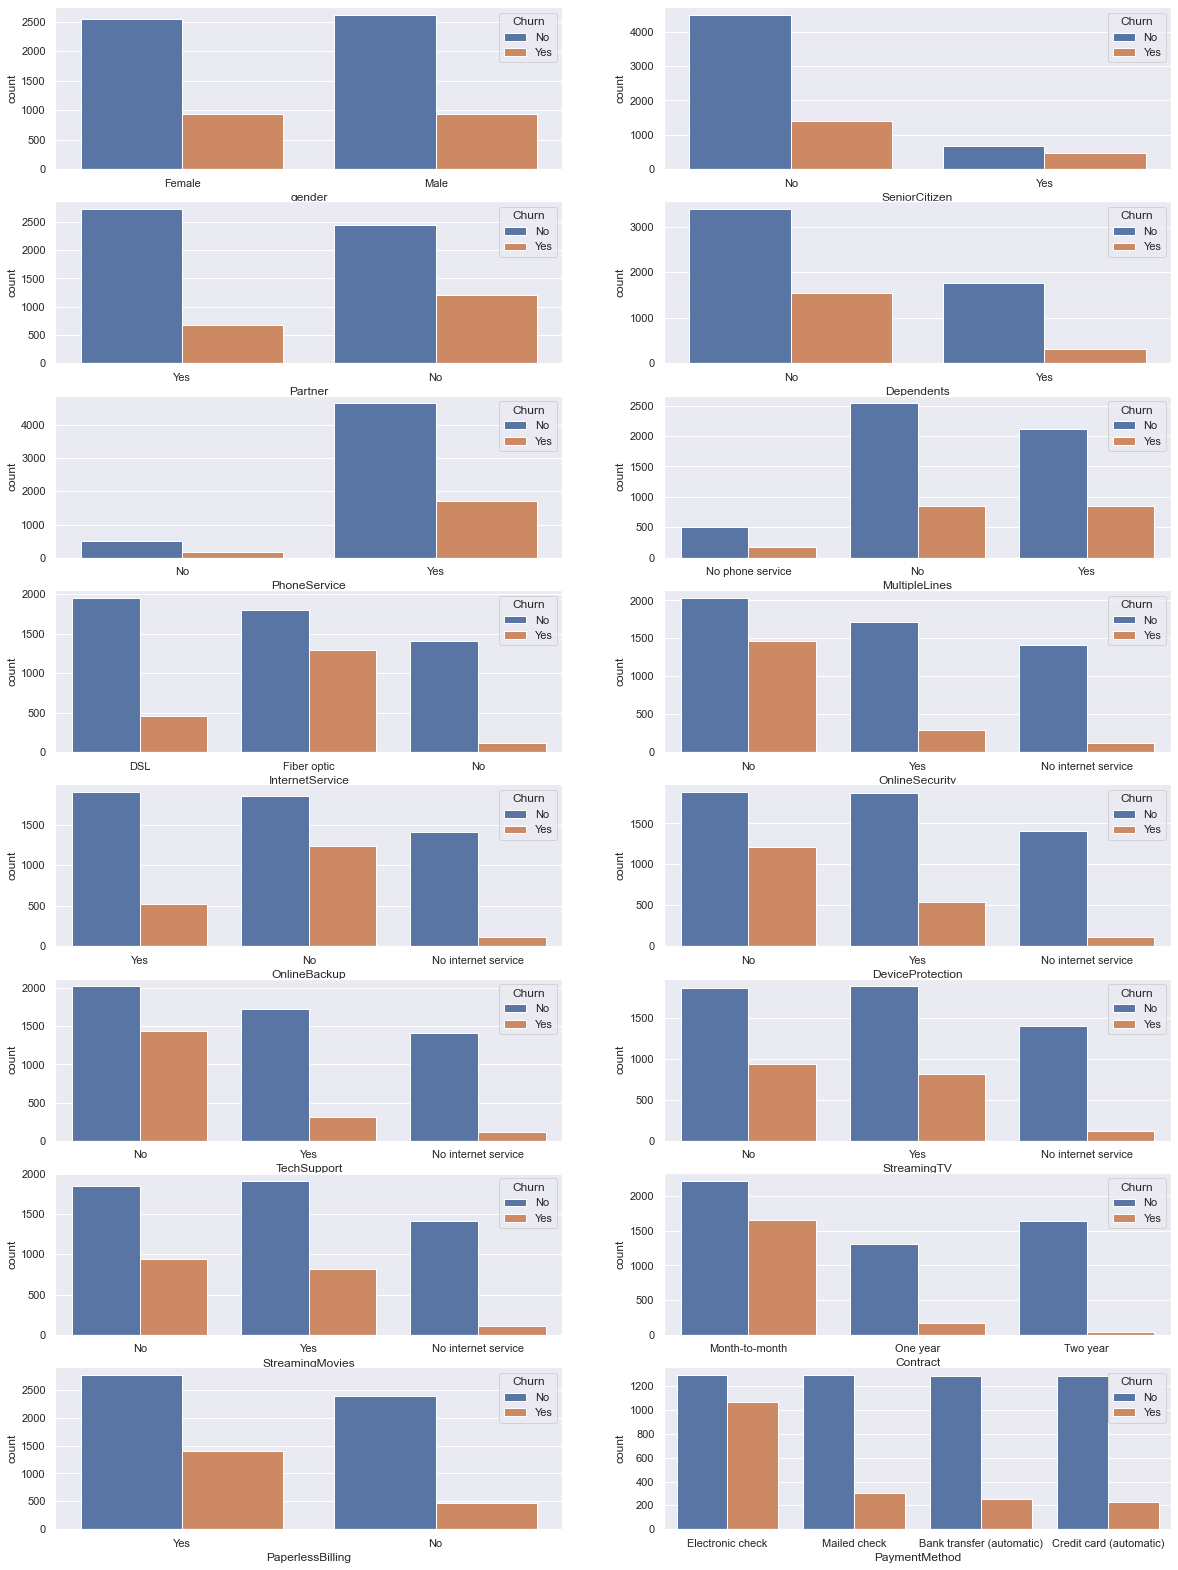

In [66]:
sns.color_palette("rocket", as_cmap=True)
plt.figure(figsize = (20,28))
j=1
for i in cat_list:
    plt.subplot(8,2,j)
    sns.countplot(x = df[i],hue = df['Churn'])
    j+=1
plt.show()

* Males and Femal have similar churn rate
* Those who have a Partner / Dependents Churn less
* Those who have Fiber Optic Intenet Service they Churn
* Customers having No Online Security / No Online Backup also Churn
* Customers who do not have Device Protection/ Tech Support also Churn
* People with Month-to-Month Contract Churn the most
* Payment wise customers who do Electronic Check and Paperless Billing also Churn
* those who are not senior churn

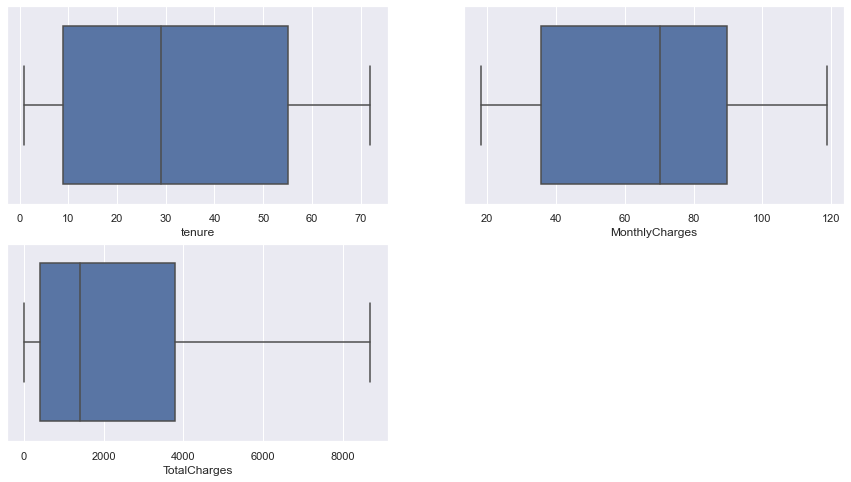

In [67]:
sns.color_palette("rocket", as_cmap=True)
j=1
plt.figure(figsize = (15,8))
for i in number_list:
    
    plt.subplot(2,2,j)
    sns.boxplot(df[i])
    j=j+1
plt.show()
    

* we do not have outliers 

<AxesSubplot:xlabel='MonthlyCharges'>

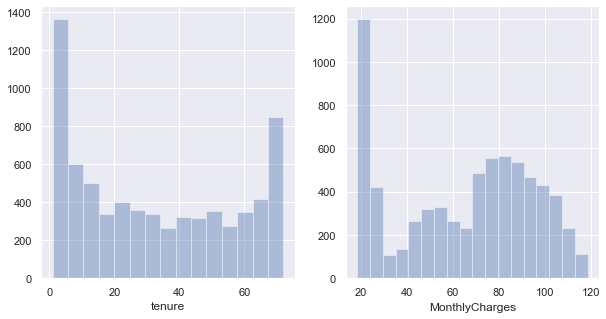

In [68]:
sns.color_palette("rocket", as_cmap=True)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(df['tenure'], kde = False)
plt.subplot(1,2,2)
sns.distplot(df['MonthlyCharges'], kde = False)

 we can see at the Tenure column that the largest amounts of value are at the minimum and maximum of the variable, when we look at the MonthlyCharge column we can see that the vast majority of customers pay very little, but it doesn't happen the phenomenon of the more expensive the smaller the number of samples

# Model

In [72]:
# preprossing
le = LabelEncoder()
new_cols = [col for col in cat_list]

def label_encoder(dataframe, new_col):
    labelencoder = LabelEncoder()
    dataframe[new_col] = labelencoder.fit_transform(dataframe[new_col])
    return dataframe

for col in new_cols:
    df = label_encoder(df, col)

In [ ]:
num_cols = [col for col in number_list] 
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()


In [73]:
y = df['Churn']
X = df.drop(['Churn'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)


0.7924170616113744